## Using free available samples: Parkinson analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
PD=[2,2,2,2,1,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4]
TapPD = list()
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-41126e25-aa15-419f-af14-1aa8e78d870e1383831155599447443.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-e721d2e0-5930-4071-a840-f898883710265378819541683273264.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-a307e4ae-d49a-4f96-a294-b9e56a30c0446583375764081646363.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-532d5097-0e27-49a9-a8e6-7a26c63210bf8048991346106322245.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-dc348d0b-2457-4394-8bea-86b5975a92a68229272086582075256.tmp'))

TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-bc72f80c-42b0-4ece-9e46-d75eb78467366264188730012735288.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-c5563a25-a238-421d-be38-7a5134ff45177388291754517110557.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-e255a421-36f0-4fd8-b548-dd67dedb445a8941215721774187059.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-b2bafa3c-3178-46fd-81d3-c1a0e0a8ab965371216142531495452.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-bac511da-1c4a-40e7-a4a9-2770bd74c1178230558000319275806.tmp'))

TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-9891461a-2eaa-4a37-852f-b6e0d51c56737688883730723990581.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-d1a0ff32-6756-4c65-bd7b-d5b60faec3926194198098794520520.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-3339eb37-cbca-470a-838f-09b553e50d5d3483250691459460603.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-f6a5df58-a213-40cc-9dd1-d726144b178a7158428480297972834.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-c755675b-7149-481a-aa19-b76db83db84d2150209084706275.tmp'))

TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-e5cb5f69-a75a-49cc-83b4-dd0871a6b4fb6002873297461980535.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-1a642746-7f22-421b-a6de-d90eabf99ba96278340256554412503.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-91ee9bcc-065d-4916-882a-53939ffb05962701562103948048429.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-a455a73c-1966-437f-a60e-e0433016ea128863241944941337544.tmp'))
TapPD.append(pd.read_json('/Users/catalina/Downloads/tapping_results.json.TappingSamples-2e87c348-d2e1-450f-9c34-2eab52fda5af111790938118683279.tmp'))



In [2]:
print(TapPD[0])

     TapTimeStamp     TappedButtonId TapCoordinate
0        0.000000   TappedButtonLeft   {99, 426.5}
1        0.000525  TappedButtonRight  {234.5, 403}
2        0.726266   TappedButtonNone    {104, 422}
3        0.728167   TappedButtonLeft    {104, 422}
4        0.728593   TappedButtonLeft    {104, 422}
..            ...                ...           ...
133     19.469220   TappedButtonNone     {91, 415}
134     19.621840   TappedButtonLeft     {91, 415}
135     19.752176   TappedButtonNone  {194, 396.5}
136     19.905026  TappedButtonRight  {194, 396.5}
137     19.986031   TappedButtonNone   {79.5, 418}

[138 rows x 3 columns]


In [3]:
def TapPerformance(TapPD1):
    
    TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonLeft'] = 0
    TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonRight'] = 1
    TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonNone'] = 2
    TapPD1 = Artifactfixed(TapPD1)
    TapPerf= TapPD1.shape[0]
    return (TapPerf,TapPD1)

In [4]:
#Index=list()
def Artifactfixed(TapCont):
    Ind =  [True] * TapCont.shape[0]
    for item in range(0,TapCont.shape[0]-1):
        if TapCont.TapCoordinate[item]==TapCont.TapCoordinate[item+1]:
            if TapCont.TappedButtonId[item]==2:
                Ind[item]=False
            elif TapCont.TappedButtonId[item+1]==2:
                Ind[item]=False
    TapContArtFixed=TapCont[Ind]
    return TapContArtFixed
          

<ipython-input-3-3127cb324411>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonLeft'] = 0
<ipython-input-3-3127cb324411>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedButtonRight'] = 1
<ipython-input-3-3127cb324411>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TapPD1.TappedButtonId[TapPD1.TappedButtonId == 'TappedBu

    PDClass  TapPerfor PDOn
0         2         74    1
1         2        166    1
2         2        201    1
3         2        134    1
4         1         32    1
5         0        392    0
6         0        212    0
7         0        394    0
8         0        302    0
9         0        180    0
10        0        138    0
11        0        242    0
12        4         47    1
13        4         64    1
14        4        232    1
15        4        237    1
16        4        289    1
17        4         70    1
18        4         38    1
19        4        168    1


[Text(0, 0, 'Control'),
 Text(1, 0, 'Before Med'),
 Text(2, 0, 'After Med'),
 Text(3, 0, 'Another Time')]

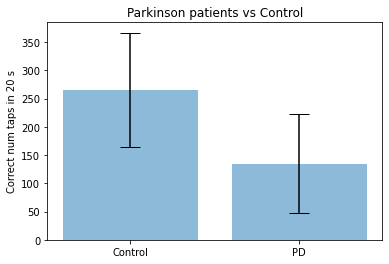

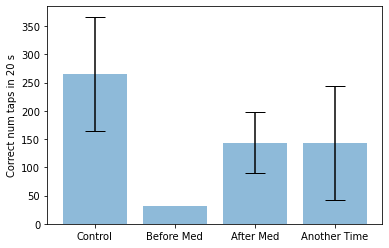

In [5]:
TapRes = list()
TapPer = list()
for i in range(0,len(TapPD)):
     TapRes.append(TapPerformance(TapPD[i]))
        
for item in TapRes:
    TapPer.append(item[0])
#Making a table with performance
dic = {'PDClass':PD,'TapPerfor':TapPer}
df = pd.DataFrame(dic)

# create a list of our conditions
conditions = [(df['PDClass'] != 0 )]
# create a list of the values we want to assign for each condition
values = ['1']
# create a new column and use np.select to assign values to it using our lists as arguments
df['PDOn'] = np.select(conditions, values)

# Look at statistics of presence or absence of disease in Tap performance

byPDOnAv=df.groupby(by='PDOn').mean()['TapPerfor']
byPDOnStd=df.groupby(by='PDOn').std()['TapPerfor']

#AvgTapPerf2=byPDOn.std();
fig, ax = plt.subplots()
ax.bar([0,1], byPDOnAv, yerr=byPDOnStd, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Correct num taps in 20 s')
ax.set_xticks([0,1])
ax.set_xticklabels(['Control','PD'])
ax.set_title('Parkinson patients vs Control')
#print(byPDOnStd)

byPDGenAv=df.groupby(by='PDClass').mean()['TapPerfor']
byPDGenStd=df.groupby(by='PDClass').std()['TapPerfor']

print(df)
fig, ax = plt.subplots()
ax.bar([0,1,2,3], byPDGenAv, yerr=byPDGenStd, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Correct num taps in 20 s')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Control','Before Med','After Med', 'Another Time'])
#ax.set_title('Parkinson patients vs Control')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

XTapPerf = df['TapPerfor'].to_numpy()
XTapPerf = np.reshape(XTapPerf, (-1,1))
YTap = df['PDOn'].to_numpy()
YTap=YTap.astype(float)
YTap=np.ravel(YTap)
#YTap = np.reshape(YTap, (-1,1))
X_train, X_test, y_train, y_test = train_test_split(XTapPerf,YTap , test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)

#Training logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.intercept_/logreg.coef_)



#Predicting 
#y_pred = logreg.predict(y_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#print(classification_report(y_test, y_pred))

(14, 1)
(14,)
[[-0.01567732]]
[3.94280462]
[[-251.49743309]]


In [ ]:
c = np.linspace(20, 500, num=100)
Prob = 1/(1+np.exp(logreg.intercept_+ np.multiply(logreg.coef_, c)))
#print(np.ravel(X_train))
plt.plot(c,np.ravel(Prob))
plt.plot(np.ravel(X_train),np.ravel(y_train), 'o')
plt.plot(np.ravel(X_test),np.ravel(y_test), 'ro')

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))